# LBPD Stop EDA

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [153]:
file_path = '/Users/terencerustia/Documents/Data Science/Long Beach Policing Analysis/processed_data/'

# Race

In [154]:
race_df = pd.read_csv(file_path + 'PROCESSED_1_race.csv')
race_df.drop('ObjectId', axis=1, inplace=True)
race_df.rename(columns= lambda x: re.sub('perceivedRace_', '', x), inplace=True)

In [155]:
race_df.head(3)

,StopID,PID,Asian,Black,Hispanic,Middle Eastern or South Asian,Native American,Pacific Islander,White
0,5782,1,0,0,0,0,0,0,1
1,5785,1,0,0,0,0,0,0,1
2,5786,1,0,0,0,0,0,0,1


In [156]:
race_cols = race_df.drop(['StopID', 'PID'], axis=1).columns

### Aggregate number of police stops

In [157]:
print('The total number of LBPD police stops in 2019 is', len(race_df['StopID'].unique()))

The total number of LBPD police stops in 2019 is 36788


In [158]:
stop_sums = pd.DataFrame(race_df[race_cols].sum()).reset_index()
stop_sums.rename(columns={'index': 'race', 0: 'total_stops'}, inplace=True)

In [159]:
stop_sums

,race,total_stops
0,Asian,3150
1,Black,12472
2,Hispanic,16716
3,Middle Eastern or South Asian,1804
4,Native American,1301
5,Pacific Islander,1700
6,White,10972


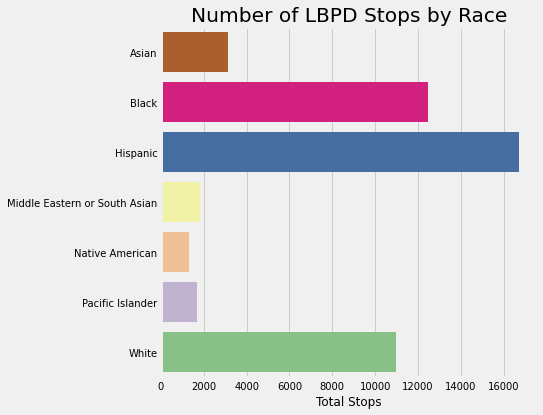

In [160]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='total_stops', y='race', data=stop_sums, palette='Accent_r')
g.set_ylabel('')
g.set_xlabel('Total Stops', fontsize=12)
g.set_title('Number of LBPD Stops by Race')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10); 

## Getting Census Data to Normalize Race Data

In [161]:
lb_census = pd.read_csv('/Users/terencerustia/Documents/Data Science/Long Beach Policing Analysis/raw_data/2019_lb_census.csv')

In [162]:
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub(' alone', '', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub(' or African American', '', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub('American Indian and Alaska Native', 'Native American', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub('Native Hawaiian and Other ', '', x))
lb_census['Race'] = lb_census['Race'].apply(lambda x: re.sub(' or Latino', '', x))

In [163]:
lb_census

,Race,Value
0,White,131216
1,Black,50432
2,Native American,668
3,Asian,54436
4,Pacific Islander,2468
5,Some other race,3008
6,Hispanic,207396


In [164]:
stop_sums_pop = stop_sums.merge(lb_census, left_on='race', right_on='Race').drop('Race', axis=1)
stop_sums_pop.rename(columns={'Value':'population'}, inplace=True)
stop_sums_pop

,race,total_stops,population
0,Asian,3150,54436
1,Black,12472,50432
2,Hispanic,16716,207396
3,Native American,1301,668
4,Pacific Islander,1700,2468
5,White,10972,131216


In [165]:
stop_sums_pop['stops_per_thousand'] = round(stop_sums_pop['total_stops'] / (stop_sums_pop['population'] / 1000), 1)
stop_sums_pop

,race,total_stops,population,stops_per_thousand
0,Asian,3150,54436,57.9
1,Black,12472,50432,247.3
2,Hispanic,16716,207396,80.6
3,Native American,1301,668,1947.6
4,Pacific Islander,1700,2468,688.8
5,White,10972,131216,83.6


In [166]:
stop_sums_pop[stop_sums_pop['race'] != 'Hispanic'].sum()

race                  AsianBlackNative AmericanPacific IslanderWhite
total_stops                                                    29595
population                                                    239220
stops_per_thousand                                            3025.2
dtype: object

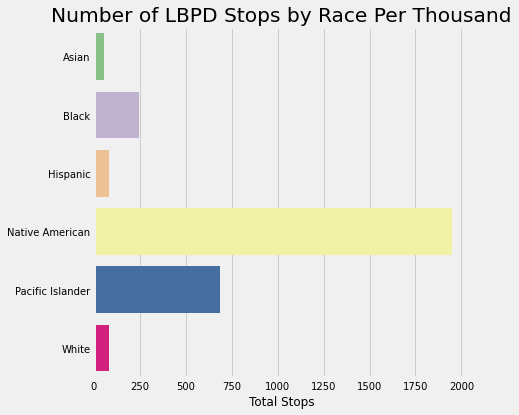

In [167]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='stops_per_thousand', y='race', data=stop_sums_pop, palette='Accent')
g.set_ylabel('')
g.set_xlabel('Total Stops', fontsize=12)
g.set_title('Number of LBPD Stops by Race Per Thousand')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10);

In [168]:
main_df = pd.read_csv(file_path + 'PROCESSED_0_to_5.csv')

/Users/terencerustia/opt/anaconda3/envs/lbpd_acab_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,9,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [169]:
main_df.head(3)

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,...,reasonForStop,reasonForStopDetail,reasonForStopcode,reasonForStopCodeText,actionTakenDuringStop,personSearchConsentGiven,propertySearchConsentGiven,resultOfStop,resultOfStopcode,resultOfStopcodeText
0,5875,2019/01/01 00:00:00,2020/06/26 07:41:59,5,0,200.0,E First St,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54153,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153,Curbside detention,NaN,NaN,Citation for infraction,54153.0,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153
1,5782,2019/01/01 00:00:00,2020/06/26 00:04:59,5,1,5900.0,Long Beach Blvd,NaN,NaN,NaN,...,Reasonable Suspicion,Other Reasonable Suspicion of a crime,38021,273(A) PC - ILLEGAL PAY FOR ADOPTION (M) 38021,Curbside detention,NaN,NaN,Field interview card completed,NaN,NaN
2,5876,2019/01/01 00:00:00,2020/06/26 18:17:00,4,0,6600.0,Butler Ave,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,None,NaN,NaN,No Action,NaN,NaN


In [170]:
black_df = main_df[main_df['perceivedRace'] == 'Black']

In [171]:
black_df = pd.DataFrame(black_df['reasonForStop'].value_counts()).reset_index().rename(columns={'index':'reason', 'reasonForStop':'count'})
black_df

,reason,count
0,Traffic Violation,11304
1,Reasonable Suspicion,10191
2,Known to be on Parole / Probation / PRCS / Man...,735
3,Investigation to determine whether the person ...,433
4,Knowledge of outstanding arrest warrant/wanted...,372
5,Consensual Encounter resulting in a search,291


In [172]:
rfs_replace_dict = {'warrant': 'Outstanding Arrest Warrant', 'Parole': 'Parole/Probation/Supervision', 'truant':'Truancy Investigation', 'Consensual Encounter': 'Consensual Encounter/Search'}

for r in rfs_replace_dict:
    black_df.loc[black_df['reason'].str.contains(r), 'reason'] = rfs_replace_dict[r]


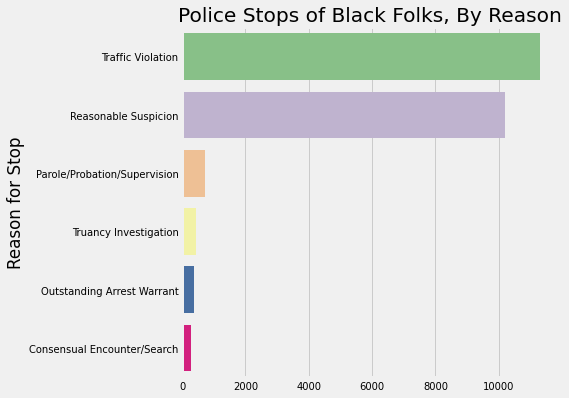

In [173]:
fig, ax = plt.subplots(figsize=(6,6))
g = sns.barplot(x='count', y='reason', data=black_df, palette='Accent')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Police Stops of Black Folks, By Reason')
ax.set_ylabel('Reason for Stop')
ax.set_xlabel('');

In [174]:
total_df = main_df[main_df['perceivedRace'].isin(['White', 'Black', 'Asian', 'Hispanic'])]
total_df.head(3)

,StopID,stopDate,stopTime,stopDuration,stopInResponseToCFS,blockNumber,street,intersection,highwayExit,landMark,...,reasonForStop,reasonForStopDetail,reasonForStopcode,reasonForStopCodeText,actionTakenDuringStop,personSearchConsentGiven,propertySearchConsentGiven,resultOfStop,resultOfStopcode,resultOfStopcodeText
0,5875,2019/01/01 00:00:00,2020/06/26 07:41:59,5,0,200.0,E First St,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54153,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153,Curbside detention,NaN,NaN,Citation for infraction,54153.0,21453(D) VC - PED AGAINST RED LIGHT/ETC (I) 54153
1,5782,2019/01/01 00:00:00,2020/06/26 00:04:59,5,1,5900.0,Long Beach Blvd,NaN,NaN,NaN,...,Reasonable Suspicion,Other Reasonable Suspicion of a crime,38021,273(A) PC - ILLEGAL PAY FOR ADOPTION (M) 38021,Curbside detention,NaN,NaN,Field interview card completed,NaN,NaN
2,5876,2019/01/01 00:00:00,2020/06/26 18:17:00,4,0,6600.0,Butler Ave,NaN,NaN,NaN,...,Traffic Violation,Moving Violation,54106,22350 VC - UNSAFE SPEED:PREVAIL COND (I) 54106,None,NaN,NaN,No Action,NaN,NaN


In [175]:
total_df = pd.DataFrame(total_df[['reasonForStop', 'perceivedRace']])

In [176]:
total_df = total_df[~total_df['reasonForStop'].str.contains('Possible conduct|school policy')]
total_df

,reasonForStop,perceivedRace
0,Traffic Violation,Black
1,Reasonable Suspicion,White
2,Traffic Violation,Hispanic
3,Knowledge of outstanding arrest warrant/wanted...,Black
4,Reasonable Suspicion,White
...,...,...
82538,Traffic Violation,Asian
82539,Traffic Violation,Asian
82540,Traffic Violation,Hispanic
82541,Traffic Violation,Black


In [177]:
rfs_replace_dict = {'warrant': 'Outstanding Arrest Warrant', 'Parole': 'Parole/Probation/Supervision', 'truant':'Truancy Investigation', 'Consensual Encounter': 'Consensual Encounter/Search'}

for r in rfs_replace_dict:
    total_df.loc[total_df['reasonForStop'].str.contains(r), 'reasonForStop'] = rfs_replace_dict[r]


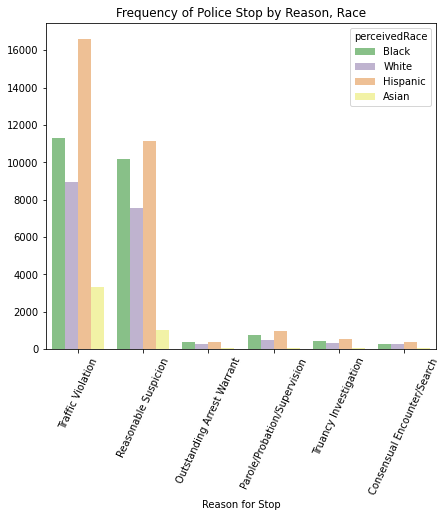

In [180]:
plt.style.use('default')
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,6))
g = sns.countplot(x='reasonForStop', data=total_df, hue='perceivedRace', palette='Accent')
ax.tick_params(axis='x', labelsize=10, rotation=65)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('Reason for Stop')
plt.ylabel('')
plt.title('Frequency of Police Stop by Reason, Race');

In [191]:
resultStop = main_df[main_df['perceivedRace'].isin(['White', 'Black', 'Asian', 'Hispanic'])]
resultStop = resultStop[~resultStop['resultOfStop'].str.contains('|'.join(['minor', 'school', 'Homeland', 'Noncriminal']))]

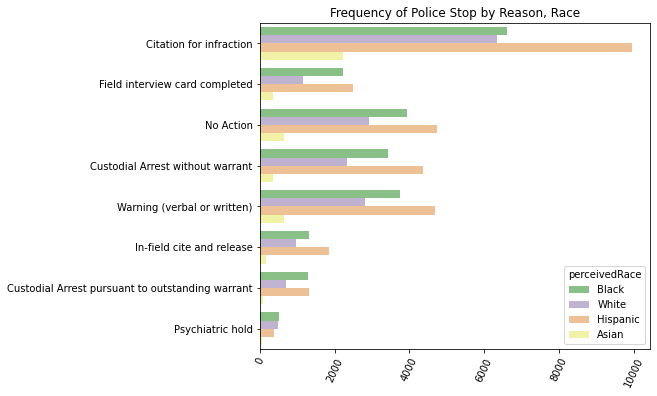

In [192]:
plt.style.use('default')
%matplotlib inline
fig, ax = plt.subplots(figsize=(7,6))
g = sns.countplot(y='resultOfStop', data=resultStop, hue='perceivedRace', palette='Accent')
ax.tick_params(axis='x', labelsize=10, rotation=65)
ax.tick_params(axis='y', labelsize=10)
plt.xlabel('')
plt.ylabel('')
plt.title('Frequency of Police Stop by Reason, Race');

In [195]:
# Per thousand calculation